In [638]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [639]:
df  = pd.read_csv("diabetes.csv")

In [640]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [641]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [642]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [643]:
sum(df.isnull().sum())

0

In [644]:
import numpy as np

# Assuming df is your DataFrame with the specified columns
x = df.iloc[:, 1:8]  # Select columns 2 to 8 (0-based indexing)
for col in x.columns:
    df[col] = df[col].replace(0, np.nan)


In [645]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [646]:
#del df['SkinThickness']

In [647]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [648]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,763.0,121.686763,30.535641,44.000,99.00000,117.0000,141.00000,199.00
BloodPressure,733.0,72.405184,12.382158,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,541.0,29.153420,10.476982,7.000,22.00000,29.0000,36.00000,99.00
Insulin,394.0,155.548223,118.775855,14.000,76.25000,125.0000,190.00000,846.00
BMI,757.0,32.457464,6.924988,18.200,27.50000,32.3000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [649]:
x =df.iloc[:,1:8]
x.describe().T

,count,mean,std,min,25%,50%,75%,max
Glucose,763.0,121.686763,30.535641,44.000,99.00000,117.0000,141.00000,199.00
BloodPressure,733.0,72.405184,12.382158,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,541.0,29.153420,10.476982,7.000,22.00000,29.0000,36.00000,99.00
Insulin,394.0,155.548223,118.775855,14.000,76.25000,125.0000,190.00000,846.00
BMI,757.0,32.457464,6.924988,18.200,27.50000,32.3000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00


In [650]:

df.rename(columns={'DiabetesPedigreeFunction':'DPF'},inplace=True)

In [651]:
x.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148.0,72.0,35.0,NaN,33.6,0.627,50
1,85.0,66.0,29.0,NaN,26.6,0.351,31
2,183.0,64.0,NaN,NaN,23.3,0.672,32
3,89.0,66.0,23.0,94.0,28.1,0.167,21
4,137.0,40.0,35.0,168.0,43.1,2.288,33


In [652]:
print(x.isnull().sum())

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64


In [653]:
x.fillna(x.mean(),inplace=True)

In [654]:
x.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148.0,72.0,35.00000,155.548223,33.6,0.627,50
1,85.0,66.0,29.00000,155.548223,26.6,0.351,31
2,183.0,64.0,29.15342,155.548223,23.3,0.672,32
3,89.0,66.0,23.00000,94.000000,28.1,0.167,21
4,137.0,40.0,35.00000,168.000000,43.1,2.288,33


In [655]:
y = df.iloc[:,-1:]

In [656]:
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [657]:
scaler = StandardScaler()
x =scaler.fit_transform(x)

In [658]:
x[0:5]

array([[ 8.65108070e-01, -3.35182392e-02,  6.65502121e-01,
        -3.34507888e-16,  1.66291742e-01,  4.68491977e-01,
         1.42599540e+00],
       [-1.20616153e+00, -5.29859033e-01, -1.74633816e-02,
        -3.34507888e-16, -8.52531177e-01, -3.65060778e-01,
        -1.90671905e-01],
       [ 2.01581340e+00, -6.95305964e-01,  8.08793628e-16,
        -3.34507888e-16, -1.33283341e+00,  6.04397318e-01,
        -1.05584152e-01],
       [-1.07465235e+00, -5.29859033e-01, -7.00428884e-01,
        -7.24388738e-01, -6.34211980e-01, -9.20762614e-01,
        -1.04154944e+00],
       [ 5.03457822e-01, -2.68066914e+00,  6.65502121e-01,
         1.46550563e-01,  1.54897999e+00,  5.48490910e+00,
        -2.04963989e-02]])

In [659]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=48)

In [660]:
x_train.shape

(614, 7)

In [661]:
x_test.shape

(154, 7)

In [662]:
#ploting chart of variation of error 
error_rate = []
correct_sum = [] 
for i in range(1, 40):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    
    # Convert predictions and true labels to NumPy arrays and flatten them
    pred_array = np.array(pred).flatten()
    y_test_array = np.array(y_test).flatten()
    
    # Compare element-wise and sum the correct predictions
    correct = np.sum(pred_array == y_test_array)
    correct_sum.append(correct)
    
    # Calculate the error rate using element-wise comparison and mean
    error_rate.append(np.mean(pred_array != y_test_array))


C:\Users\Lakshan Lahiru\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Lakshan Lahiru\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Lakshan Lahiru\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Lakshan Lahiru\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

Minimum error rate: 0.18831168831168832 at K = 21


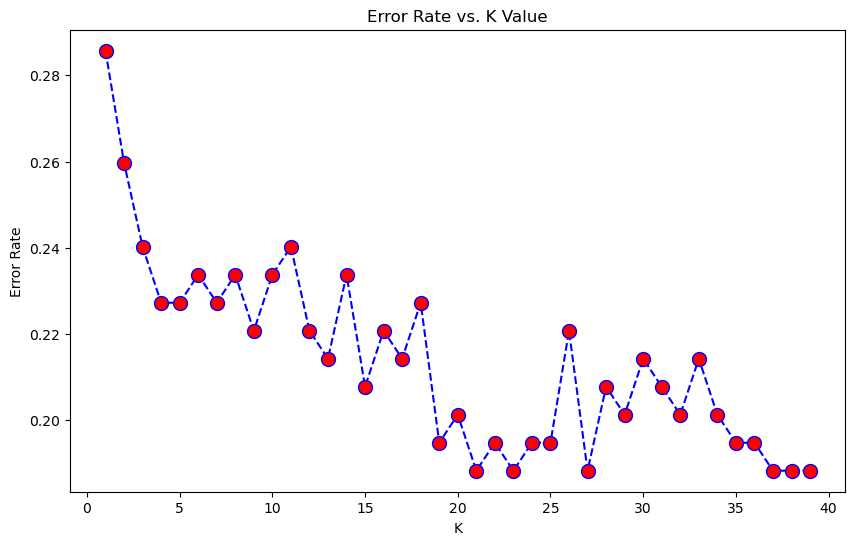

In [663]:
plt.figure(figsize=(10,6))
plt.plot(range(1, 40), error_rate, color='blue', linestyle='dashed', 
         marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

min_error_rate = min(error_rate)
min_error_rate_index = error_rate.index(min_error_rate) + 1  # Adjust for indexing starting from 1
print("Minimum error rate:", min_error_rate, "at K =", min_error_rate_index)

In [664]:
model = KNeighborsClassifier(n_neighbors=21)
model.fit(x_train, y_train)
pred = model.predict(x_test)

C:\Users\Lakshan Lahiru\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [665]:
accuracy_score(y_test,pred)

0.8116883116883117

In [666]:
y_test.shape

(154, 1)

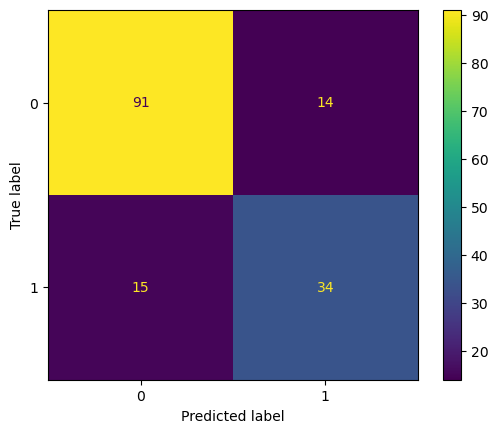

In [637]:
#confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming y_test contains the true labels and pred contains the predicted labels

# Calculate the confusion matrix
cm = confusion_matrix(y_test, pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
